In [1]:
'''
TİTANİC PROJESİ

KÜTÜPHANELERİN YÜKLENMESİ
'''
!pip install lightgbm # microsoft tarafından geliştirilen ensemble(topluluk) öğrenmesi algoritmalarından lightgbm algoritmasını indireceğiz.
!pip install catboost # yandex tarafında geliştirilen ensemble(topluluk) öğrenmesi algoritmalarından catboost algoritmasını indireceğiz.
import numpy as np # matematiksel işlemler için kullanılan numpy kütüphanesini yükleyeceğiz.
import pandas as pd # veri manipülasyonu için pandas kütüphanesini kullanacağız.
import matplotlib.pyplot as plt # görselleştirme için matplotlib ve seaborn kütüphanelerini kullanacağız.
import seaborn as sns
from collections import Counter
import warnings # uyarıları kapatmak için warnings.filterwarnings kütüphanesini import edip uyarıları 'ignore' yapacağız.
warnings.filterwarnings("ignore")
!pip install missingno  # eksik veriler arasında kolerasyon olup olmadığını anlamak için missingno kütüphanesini kullanacağız.
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor # Aykırı değerleri tespit etmek için LocalOutlierFactor kullanacağız.

     |████████████████████████████████| 1.8 MB 14.9 MB/s 
     |████████████████████████████████| 65.7 MB 12 kB/s 


In [2]:
'''
VERİYE GENEL BAKIŞ
'''
# kaggle.com'da titanic veristedi train ve test olarak ayrılmış olduğu için bizde böyle kullanacağız.
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.columns # verinin kaç kolondan oluşuğuna bakmak için  columns komutunu kullanacağız.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.info() # veri hakkında genel bir bilgi sahibi olmak için info() fonksiyonu kullanılır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.head() # head() fonksiyonu ile verinin ilk satırlarına bakacağız.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe().T # describe() ile numerik değerlerin ortalaması, standart sapması, minumun-maximum değerleri ve çeyreklerine bakacağız 

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
'''
GÖRSELLEŞTİRME
Veriyi kategorik ve numerik olarak ayırıp görselleştirme yapacağız.
kategorik değişkenler :  'Pclass', 'Name', 'Sex', 'Cabin', 'Embarked', 'Ticket', 'Survived', 'SibSp', 'Parch'
numerik değişkenler :    'Age', 'Fare'
'''

"\nGÖRSELLEŞTİRME\nVeriyi kategorik ve numerik olarak ayırıp görselleştirme yapacağız.\nkategorik değişkenler :  'Pclass', 'Name', 'Sex', 'Cabin', 'Embarked', 'Ticket', 'Survived', 'SibSp', 'Parch'\nnumerik değişkenler :    'Age', 'Fare'\n"

In [9]:
'''
KATEGORİK VERİLERİ GÖRSELLEŞTİRMEK İÇİN ÖNCE BİR FONKSİYON YAZACAĞIZ.
'''
def show_data_with_bar_plot(datas_feature):
    data_to_visualize = train_df[datas_feature]
    plt.figure(figsize=(9,3))
    plt.title(datas_feature)
    sns.countplot(data_to_visualize)
    plt.show()

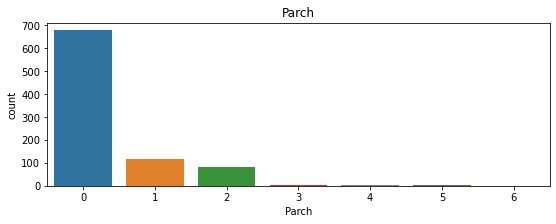

In [10]:
data_category = ['Pclass', 'Sex', 'Cabin', 'Embarked', 'Survived', 'SibSp', 'Parch']
for feature in data_category:
    show_data_with_bar_plot(feature)

In [11]:
'''
NUMERİK VERİLERİ GÖRSELLEŞTİRMEK İÇİN FONKSİYON YAZACAĞIZ.
'''
def show_data_with_histogram_plot(datas_feature):
    plt.figure(figsize=(10,6))
    sns.histplot(train_df[datas_feature])
    plt.xlabel(datas_feature)
    plt.ylabel("Frequency")
    plt.title(datas_feature)
    plt.grid()
    plt.show()

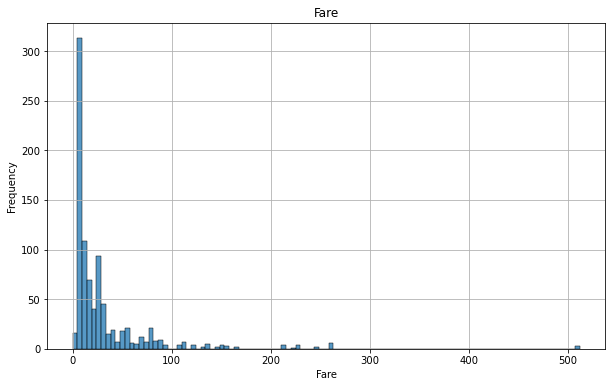

In [12]:
data_numeric = ['Age', 'Fare']
for feature in data_numeric:
    show_data_with_histogram_plot(feature)

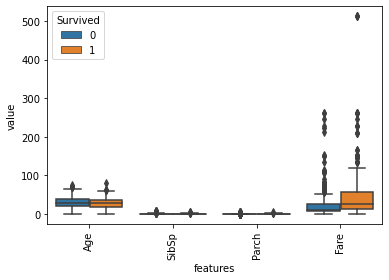

In [14]:
# Bu grafik bize columns listesinde verdiğimiz özelliklere(features) göre yolcuların hayatta kalıp ve kalmamasına göre ayırıp box plotlarını çizdi.
# Box plot ile verdiğimiz özelliklerin(features) medyanı(ortanca değeri), 1. 2. ve 3. çeyrekliklerini(Quantile) ve aykırı(outliers) değerleri gösterir.
# Sibsp ve Parch özelliklerini boxplotlarının(kutu grafiği) tek bir çizgi halinde gözükmesinin sebebi Fare ve Age özelliklerinin Sibsp ve Parch göre göreceli olarak daha büyük değerlere sahip olmasıdır.
# pandas kütüphanesinin içindeki pd.melt(var_name='features', value_name='value') fonksiyonunun var_name grafikteki x eksenini ve value_name ise y eksenini temsil eder.
columns = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
df_melted = pd.melt(train_df[columns], id_vars='Survived', var_name='features', value_name='value')
plt.figure()
sns.boxplot(x ='features', y='value', hue='Survived', data=df_melted)
plt.xticks(rotation=90)
plt.show()

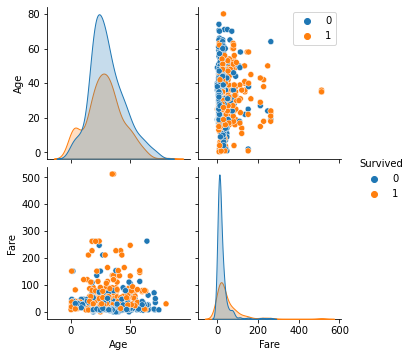

In [45]:
# Hayatta kalmaya(Survived) göre Age(yaş) ve Fare(ücret) dağılımları
plt.figure(figsize=(18,18))
sns.pairplot(train_df[['Survived', 'Age', 'Fare']], diag_kind="kde", hue='Survived')
plt.legend()
plt.show()

In [12]:
'''
TEMEL VERİ ANALİZİ (Basic Data Analysis)
    Bu kısımda hayatta halma ile ilişkili olabilecek özellikleri(features) inceleyeceğiz.
    1) Titanik gemisindeki yolcuların hayatta kalmaları(Survived) ile biniş sınıfı(Pclass) arasındaki ilişki
        Pclass vs Survived 
    2) Yolcuların cinsiyetleri(Sex) ile hayatta kalmaları(Survived) arasındaki ilişki
        Sex vs Survived
    3) Yolcuların kardeş veya eş sayıları(SibSp - Number of Siblings/Spouses Aboard) ile hayatta kalmaları(Survived) arasındaki ilişki
        SibSp vs Survived
    4) Yolcuların ebeveyn veya kardeş sayıları(Parch - Number of Parents/Children Aboard) ile hayatta kalmaları(Survived) arasındaki ilişki
        Parch vs Survived
    5) Yolcuların bilet ücretleri(Fare) ile hayatta kalmaları(Survived) arasındaki ilişki
        Fare vs Survived
    6) Yolcuların yaşları(Age) ile hayatta kalmaları(Survived) arasındaki ilişkiyi daha sonra inceleyeceğiz.
        Age vs Survived
'''

'\nBasic Data Analysis\npclass vs survived\nage vs survived-\nsex vs survived\nsibsp vs survived\nparch vs survived\nfare vs survived\n'

In [12]:
# 1. Sınıf yolcu % 62 ihtimalle, 2. Sınıf yolcu % 47 3. Sınıf yolcular ise % 24 oranında hayatta kalmışlar.
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# Kadın yolcuların erkek yolculara göre hayatta kalma olasılıkları daha yüksek
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# En çok hayatta kalma olasılığı yüksek olanlar kardeş veya eş sayısı 1 olanlarmış.
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
# Ebeveyn veya kardeş sayıları 3 olanların hayatta kalma olasılığı % 60
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
'''
AYKIRI GÖZLEM TESPİTİ (OUTLİERS DETECTİON)

Aykırı(Outliers) gözlemleri tespit etmek için LocalOutlierFactor() kullanacağız.
LocalOutlierFactor() Kullanmak için verinin bağımlı(y) ve bağımsız(x) değerlerini ayırmalıyız.
Önce Bağımlı değişkenlerden bu özellikleri(features) çıkarmamız gerekir['Survived', 'PassengerId', 'Name', 'Ticket', 'Embarked', 'Sex', 'Cabin','Pclass'] 
Çünkü bu kolonların aykırı gözlemleri(outliers) olmaz.
Aynı zamanda LocalOutlierFactor() kullanabilmek için eksik veri olmaması gerekir bu yüzden dropna() metodunu kullanacağız.
clf = LocalOutlierFactor() ile LocalOutlierFactor() sınıfından(class) çağırıp ondan bir instance(clf) aldık.
y_pred = clf.fit_predict(x) ile değerleri y_ped'e atadık.
[  'Age', 'SibSp','Parch', , 'Fare', ]
'''
y = train_df["Survived"]
x = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Embarked', 'Sex', 'Cabin','Pclass'], axis=1)
# x'den kategorik verileri çıkarmamız gerek sadece numerik veriler kalmalı.
x=x.dropna() # Bu fonksiyonun çalışması için eksik gözlemlerin olamaması gerek bu yüzden ilk başta eksik gözlemleri veriden çıkardık.
print(x.isna().sum())
columns = x.columns.tolist()
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)

Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64


In [17]:
# Tüm verilerin aykırılık scorunu elde etmiş olduk.
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score
outlier_score.head()

,score
0,-1.148980
1,-0.990983
2,-0.993711
3,-0.957626
4,-1.029310


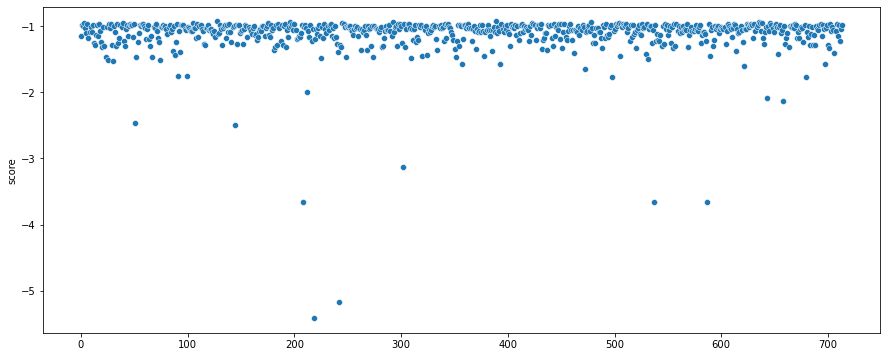

In [18]:
# Aykırı değerleri saçılım grafiği(scattterplot) ile çizdirelim.
plt.figure(figsize=(15,6))
sns.scatterplot(x=outlier_score.index.values, y=outlier_score["score"])
plt.show()

In [19]:
'''
Grafiğe bakarak verinin durumuna göre bir treshold(eşik değer) belirlemeliyiz. Biz bu gragiğe göre -3 değerini treshold belirledik.
Yani -3'den küçük değerler aykırı(outliers) olduğu için drop edilecek. -3'den küçük 6 tane aykırı gözlem var.
'''
outlier_index = outlier_score[outlier_score["score"]<-3].index.tolist()
print(outlier_index)

[208, 218, 242, 302, 537, 587]


In [20]:
# Aykırı değerleri train_df dataframemizden çıkartalım
train_df.drop(outlier_index, axis=0, inplace=True)

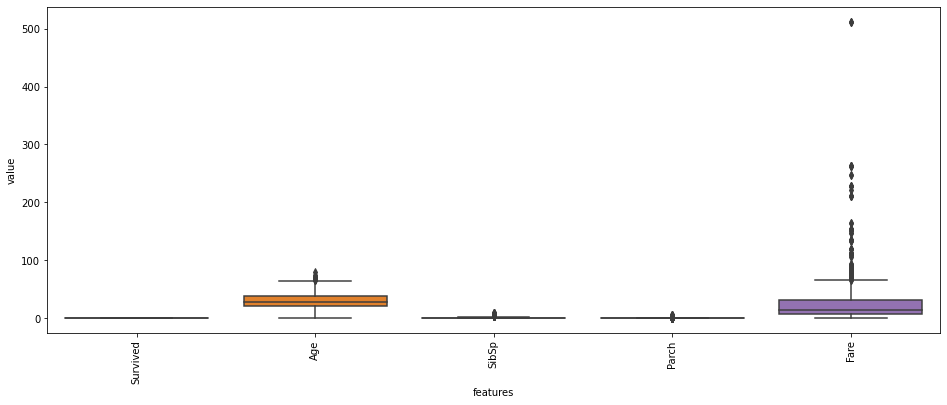

In [21]:
columns = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
data_melted = pd.melt(train_df[columns], var_name= "features", value_name= "value")
plt.figure(figsize=(16,6))
sns.boxplot(x= "features", y= "value", data= data_melted)
plt.xticks(rotation=90)
plt.show()

In [49]:
# Feature bazında aykırı(outliers) değerleri tespit edelim
def iqr_detect_outliers(dataframe,data_features):
    outliers_upper = []
    outliers_lower = []
    for c in data_features:
        quantile_1 = dataframe[c].quantile(0.25)
        quantile_3 = dataframe[c].quantile(0.75)
        iqr = quantile_3 - quantile_1
        Lower_tail = quantile_1 - 1.5 * iqr
        Upper_tail = quantile_3 + 1.5 * iqr
        for i,j in enumerate(dataframe[c]):
            if j > Upper_tail:
                dataframe.loc[i,c] = Upper_tail
                #outliers_upper.append(i)
            elif j < Lower_tail:
                dataframe.loc[i,c] = Lower_tail
                #outliers_lower.append(i)
    '''
    outliers=Counter(outliers)
    multiple_outliers=[]
    for i, v in outliers.items():
        if v > 2:
            multiple_outliers.append(i)
    return multiple_outliers
    '''

In [51]:
(iqr_detect_outliers(train_df, ['SibSp', 'Parch', 'Age', 'Fare']))

In [40]:
q=(iqr_detect_outliers(train_df, ['SibSp', 'Parch', 'Age', 'Fare']))
q

[27, 88, 159, 180, 201, 320, 337, 786, 840, 857, 739]

In [19]:
train_df.iloc[q]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [20]:
train_df=train_df.drop(q)

In [21]:
train_df_len = len(train_df)
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
'''
KAYIP VERİLER İLE MÜCADELE (MİSSİNG VALUES HANDLİNG)
'''
df.columns[df.isnull().any()] # Eksik verilerin olduğu kolonları çağırdık.

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [24]:
df.isnull().sum() # Kolonlardaki toplam eksik gözlem sayısı

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [25]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
820,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


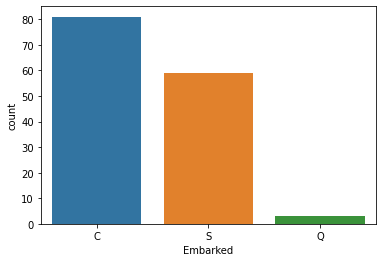

In [26]:
sns.countplot(df[(df["Pclass"] ==1) & (df["Fare"]>70)]["Embarked"])

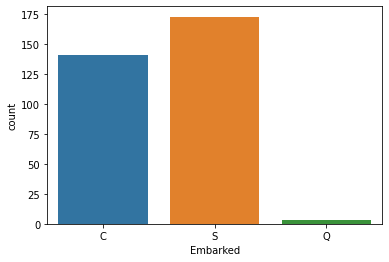

In [27]:
sns.countplot(df[(df["Pclass"] ==1)]["Embarked"])

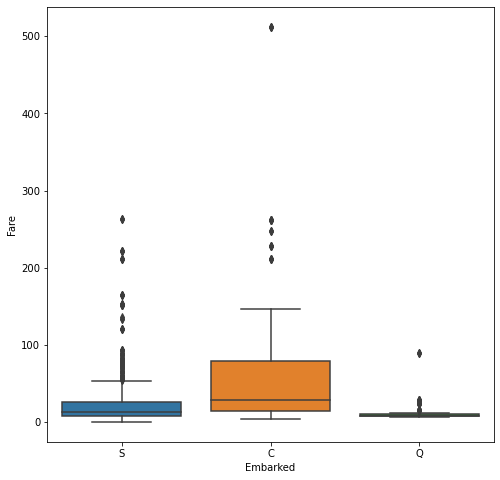

In [28]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Embarked", y = "Fare", data=df)

In [29]:
df.Embarked = df.Embarked.fillna("C")

In [30]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1032,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


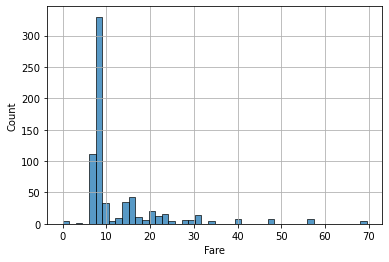

In [31]:
plt.grid()
sns.histplot(df[df["Pclass"]==3]["Fare"])
plt.show()

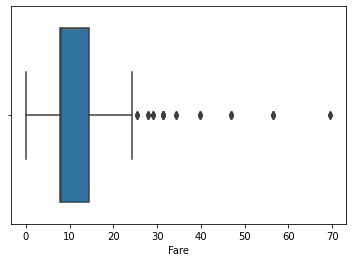

In [32]:
sns.boxplot(df[df["Pclass"]==3]["Fare"])

In [23]:
df["Fare"] = df["Fare"].fillna(df[df["Pclass"]==3]["Fare"].median())

NameError: NameError: name 'df' is not defined

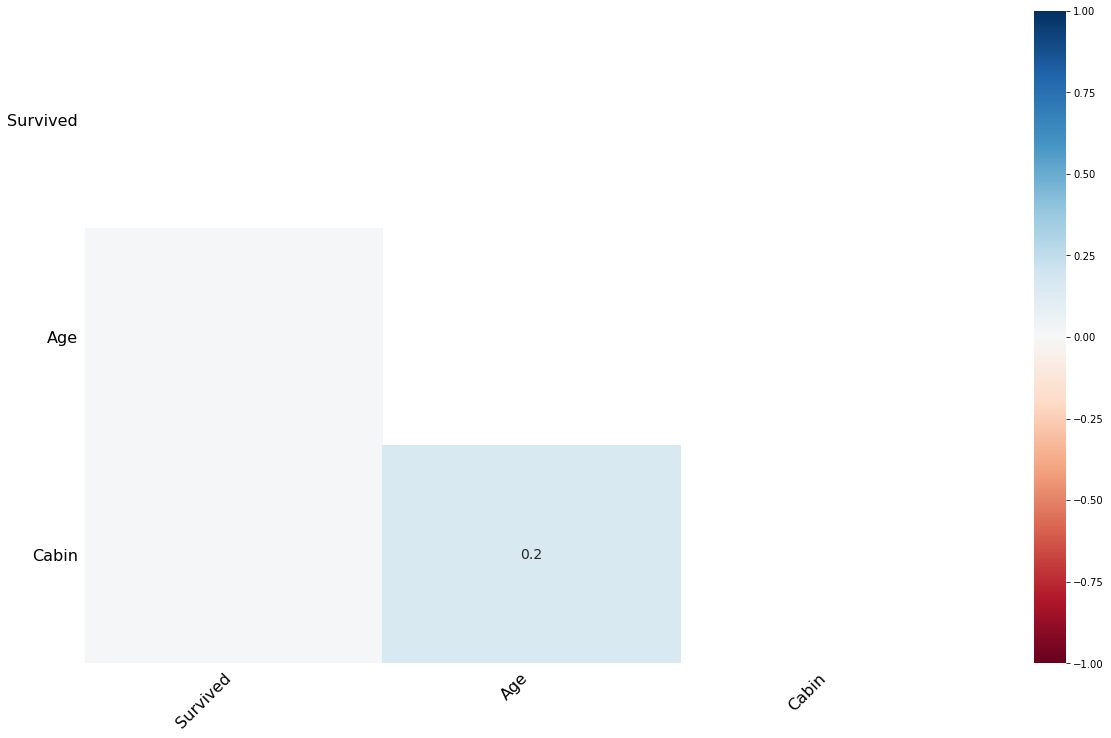

In [38]:
# Eksik veriler arasındaki kolerasyonu(ilişkiyi) görmek için missingno kütüphanesinden heatmap() fonksiyonunu kullanıyoruz.
# Bizim verisetimizde eksik gözlemlerin kendi aralarında anlamlı bir kolerasyon olmadığını bu grafikte görebiliyoruz.
msno.heatmap(df)
plt.show()

In [24]:
# Verisetinin hayatta kalmaya göre olan kolerasyonuna bakıyoruz.
train_df.corr()['Survived']

PassengerId   -0.004946
Survived       1.000000
Pclass        -0.335675
Age           -0.081116
SibSp         -0.034922
Parch          0.082160
Fare           0.254081
Name: Survived, dtype: float64

In [25]:
list1 = ["SibSp", "Parch", "Age", "Sex", "Fare", "Survived", "Pclass"]
plt.figure(figsize=(10,6))
sns.heatmap(df[list1].corr(), annot=True, fmt=".2f", linecolor="w",linewidths=.5)
plt.show()

NameError: NameError: name 'df' is not defined

<Figure size 720x432 with 0 Axes>

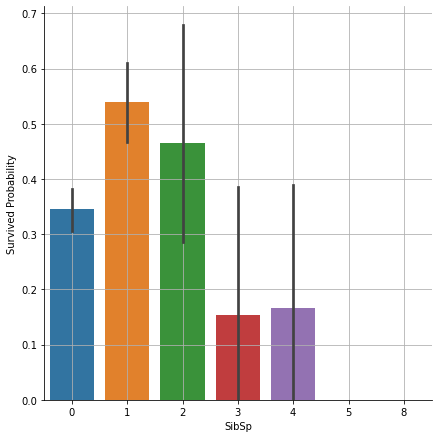

In [40]:
# SipSp vs Survived
g = sns.factorplot(x = "SibSp", y = "Survived", data = df, kind = "bar", size= 6)
plt.grid()
g.set_axis_labels(y_var="Survived Probability",x_var="SibSp")
plt.show()

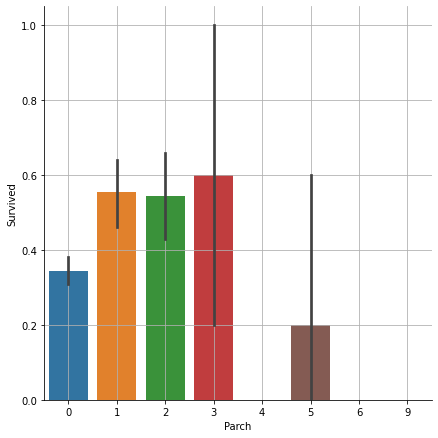

In [41]:
# Parch vs Survived
g = sns.factorplot(x ="Parch", y = "Survived", data = df, kind = "bar", size= 6)
plt.grid()
g.set_axis_labels(x_var="Parch", y = "Survived Probability")
plt.show()

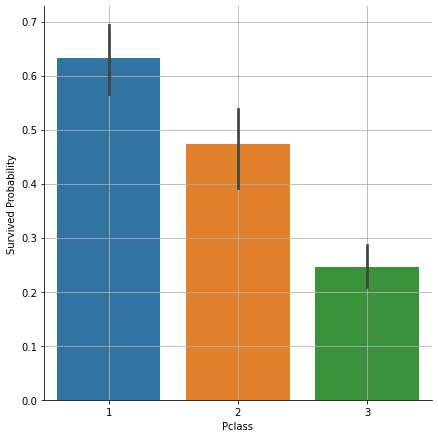

In [42]:
# Pclass vs Survived
g = sns.factorplot(x = "Pclass", y = "Survived", data = df, kind = "bar", size=6)
plt.grid()
g.set_axis_labels(x_var="Pclass", y_var = "Survived Probability")
plt.show()

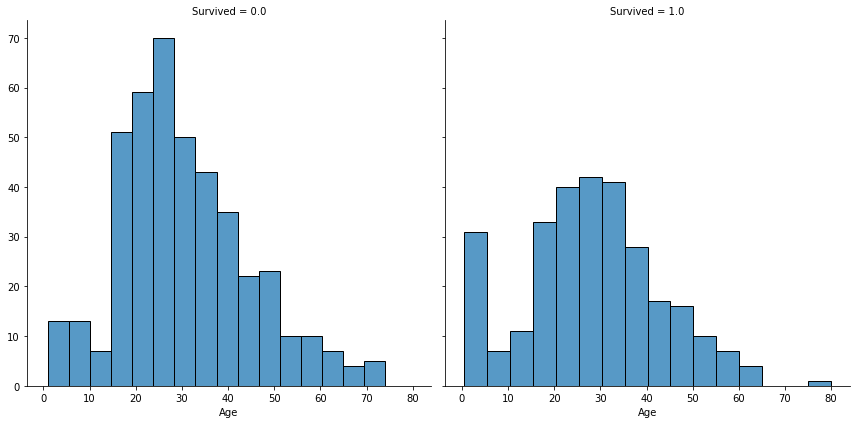

In [43]:
# Age vs Survived
g = sns.FacetGrid(df, col="Survived",size=6)
g.map(sns.histplot, "Age")
plt.show()

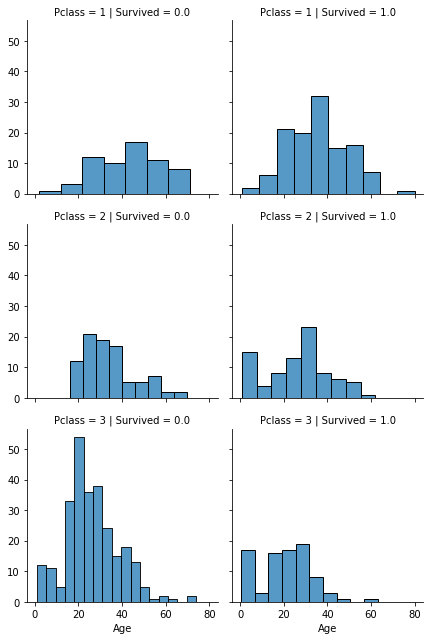

In [44]:
# Pclass, Age vs Survived
g = sns.FacetGrid(df, col= "Survived", row= "Pclass", size = 3)
g.map(sns.histplot, "Age")
g.add_legend()
plt.show()

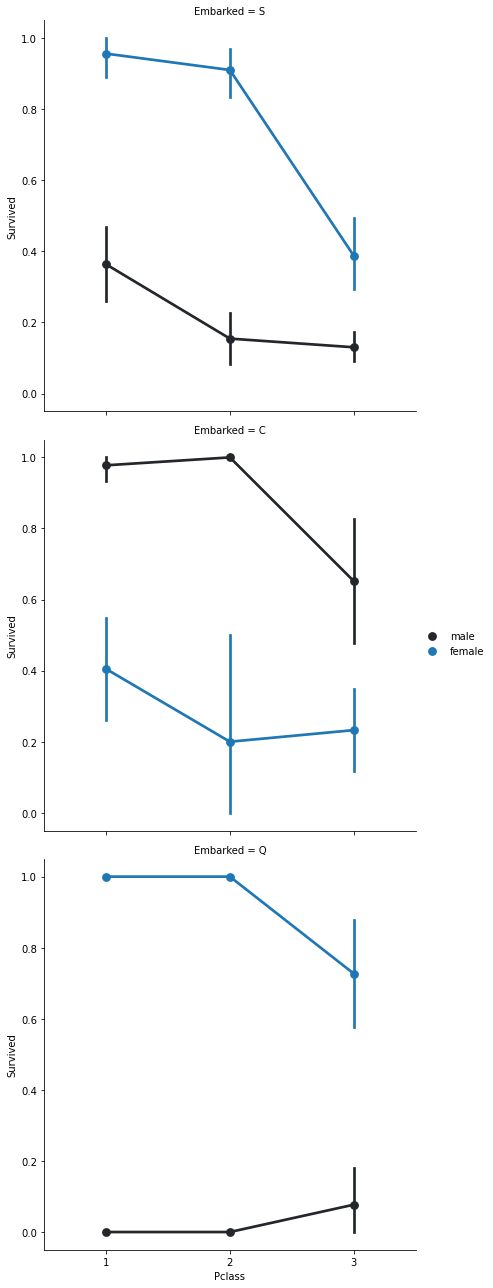

In [45]:
# Embark, Sex, Pclass vs Survived
g = sns.FacetGrid(df, row= "Embarked", size=6)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

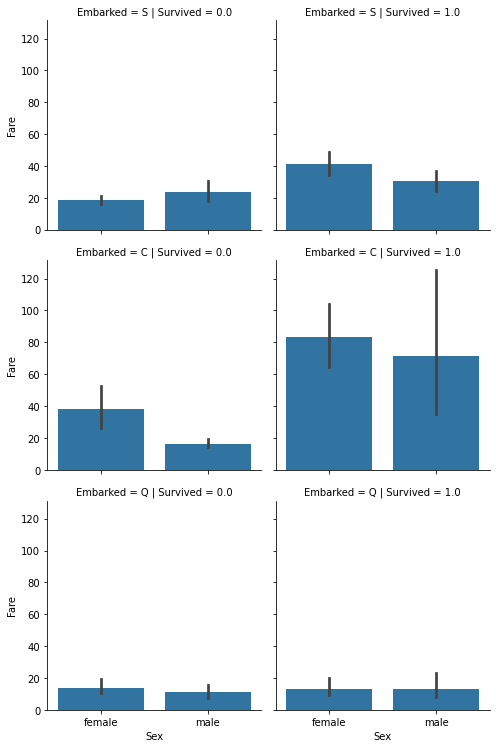

In [46]:
# Embark, Sex, Fare vs Survived
g = sns.FacetGrid(df, row= "Embarked", col= "Survived", size=3.5)
g.map(sns.barplot, "Sex", "Fare")
plt.show()

In [47]:
# Age
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1290,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1293,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1296,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


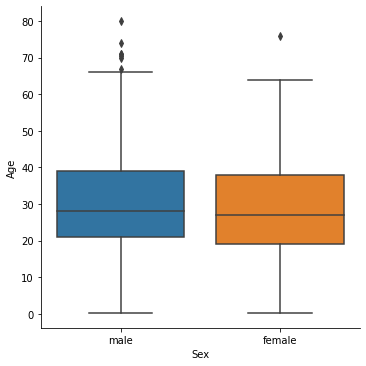

In [48]:
sns.factorplot(x = "Sex", y = "Age", data = df, kind = "box")
plt.show()

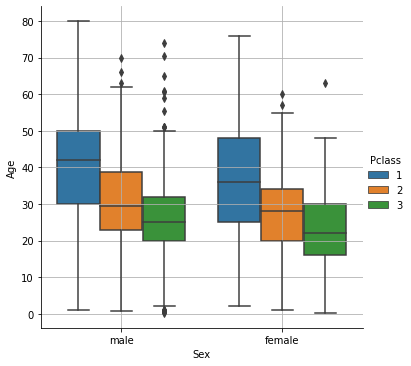

In [49]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass", data = df, kind = "box")
plt.grid()
plt.show()

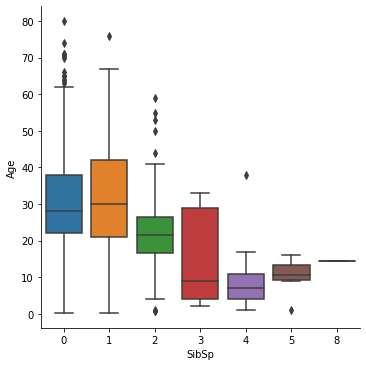

In [50]:
sns.factorplot(x = "Parch", y = "Age", data = df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = df, kind = "box")
plt.show()

In [51]:
sex = []
for i in df["Sex"]:
    if i == "male":
        sex.append(1)
    else:
        sex.append(0)

In [52]:
df.drop(["Sex"], axis=1, inplace=True)

In [53]:
df["Sex"] = sex

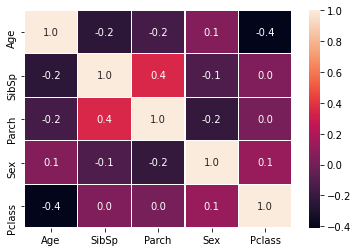

In [54]:
sns.heatmap(df[["Age","SibSp","Parch","Sex","Pclass"]].corr(), annot=True, linewidths=.2, linecolor="w", fmt=".1f")
plt.show()

In [55]:
# Age

In [56]:
index_nan_age =list(df["Age"][df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = df["Age"][((df["SibSp"]==df.iloc[i]["SibSp"]) & (df["Parch"]==df.iloc[i]["Parch"]) & (df["Pclass"]==df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred):
        df["Age"].iloc[i] = age_pred

In [57]:
 df["Age"][(df["SibSp"]==df.iloc[i]["SibSp"])].median()

29.0

In [58]:
'''
age_pred
index_nan_age
age_median = df["Age"].median()
if not np.isnan(age_pred):
    df["Age"].iloc[i] = age_pred
'''

'\nage_pred\nindex_nan_age\nage_median = df["Age"].median()\nif not np.isnan(age_pred):\n    df["Age"].iloc[i] = age_pred\n'

In [59]:
df["Age"][df["Age"].isnull()]

1222   NaN
1245   NaN
Name: Age, dtype: float64

In [60]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [62]:
# Feature Engineering
# Name & Title
title = []
name = df["Name"]
for i in name:
    title.append(i.split(".")[0].split(",")[-1].strip())

In [63]:
df["Title"] = title

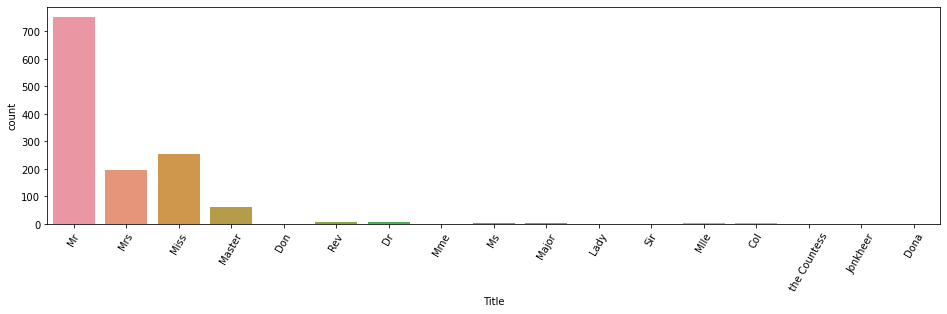

In [64]:
plt.figure(figsize=(16,4))
sns.countplot(x = "Title", data=df)
plt.xticks(rotation = 60)
plt.show()

In [65]:
unvan = df["Title"].copy()

In [66]:
for i,j in enumerate(unvan):
    if j == 'Mme' or j == 'Mlle' or j == 'Mrs' or j == 'Ms' or j == 'Miss' or j == 'Mr' :
        unvan[i]= 'Folk'
    
    elif j == 'Major' or j == 'Dr' or j == 'Capt' or j == 'Col' or j == 'Rev' or j == 'Master':
        unvan[i] = 'Ranked'
    elif j == 'Lady' or j == 'Don' or j == 'Dona' or j == 'the Countess' or j == 'Sir' or j == 'Jonkheer':
        unvan[i] = 'Royalyty'

In [67]:
unvan

0           Folk
1           Folk
2           Folk
3           Folk
4           Folk
          ...   
1293        Folk
1294    Royalyty
1295        Folk
1296        Folk
1297      Ranked
Name: Title, Length: 1298, dtype: object

In [68]:
df["Title"]=unvan

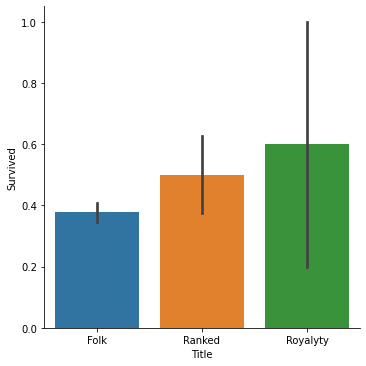

In [69]:
g = sns.factorplot(x = "Title", y = "Survived", data = df, kind = "bar")
plt.show()

In [70]:
# Family
df["Family"] = df["SibSp"] + df["Parch"] + 1

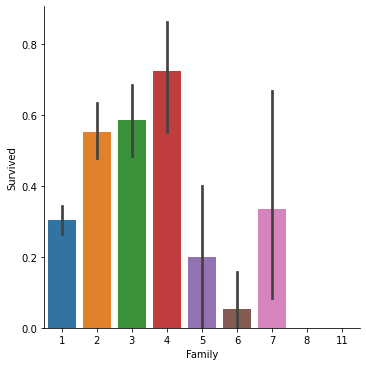

In [71]:
g = sns.factorplot(x = "Family", y = "Survived", data = df, kind = "bar")
plt.show()

In [72]:
f_size = []
for i in df["Family"]:
    if i == 1:
       f_size.append("Alone")
    elif 1<i<5:
        f_size.append("Small Family")
    else:
        f_size.append("Big Family")

In [73]:
df["Family Size"] = f_size

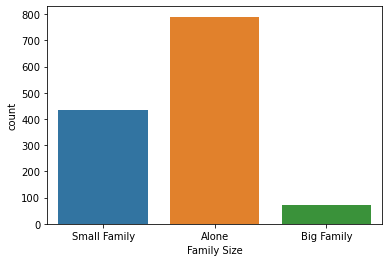

In [74]:
sns.countplot(df["Family Size"])
plt.show()

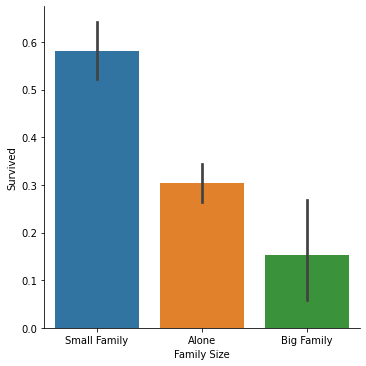

In [75]:
g = sns.factorplot(x = "Family Size", y = "Survived", data = df, kind = "bar")
plt.show()

In [76]:
df = pd.get_dummies(df, columns=["Family Size"])

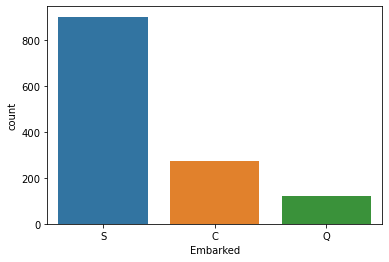

In [77]:
sns.countplot(df.Embarked)
plt.show()

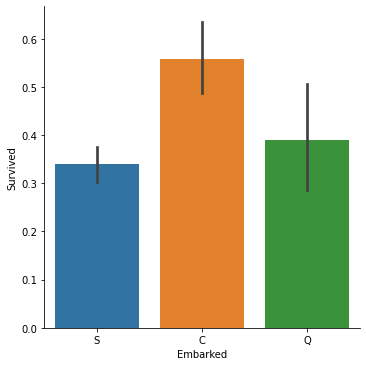

In [78]:
# Embarked
g = sns.factorplot(x = "Embarked", y = "Survived", data = df, kind = "bar")
plt.show()

In [79]:
df = pd.get_dummies(df, columns= ["Embarked"])

In [80]:
# Ticket
df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [81]:
tickets = []
for i in list(df["Ticket"]):
    if not i.isdigit():
        tickets.append(i.replace(".", "").replace("/","").strip().split()[0])
    else:
        tickets.append("x")

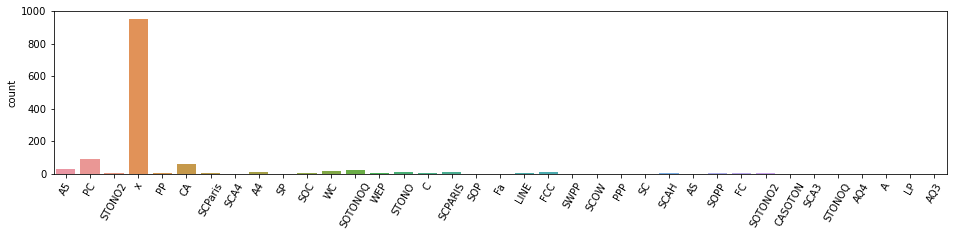

In [82]:
plt.figure(figsize=(16,3))
sns.countplot(tickets)
plt.xticks(rotation = 60)
plt.show()

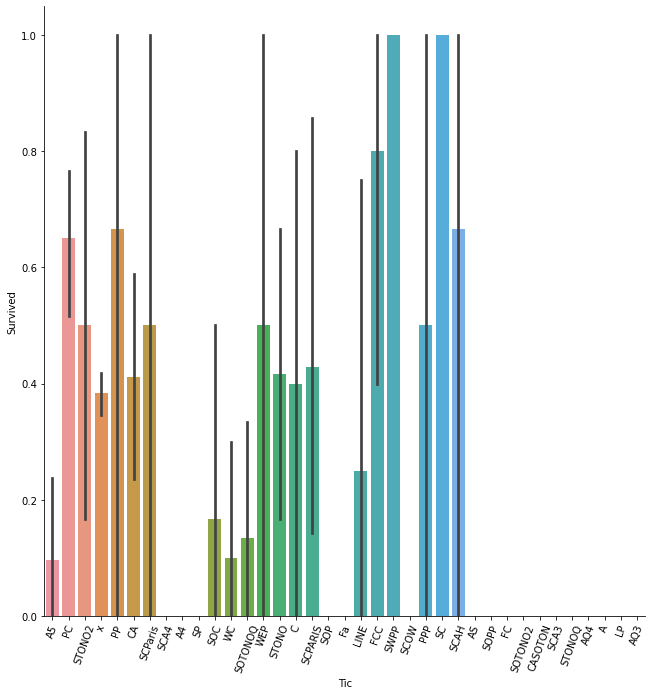

In [83]:
df["Tic"] = tickets
sns.factorplot(x="Tic", y = "Survived", data = df, kind ="bar",size=9)
plt.xticks(rotation = 70)
plt.show()

In [84]:
'''
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
df['Tic']= label.fit_transform(df['Tic'])
'''

"\nfrom sklearn import preprocessing \nlabel = preprocessing.LabelEncoder() \ndf['Tic']= label.fit_transform(df['Tic'])\n"

In [85]:
df = pd.get_dummies(df, columns=['Tic'])

In [86]:
# Pclass
df = pd.get_dummies(df, columns=["Pclass"])

In [128]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [89]:
# Ordinal Encoding
ordinal_Encoding = {'Folk': 1, 'Ranked': 2, 'Royalyty': 3}
df["Title"] = df["Title"].map(ordinal_Encoding)

In [90]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,...,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP,Tic_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,...,0,0,0,0,0,0,1,0,0,1


In [91]:
train_df_len

880

In [92]:
test = df[train_df_len :]
test.drop(labels = ["Survived"], axis= 1, inplace=True)
train = df[:train_df_len]
x_train = train.drop(labels=["PassengerId", "Cabin", "Survived", "Name", "Ticket", "Family"], axis=1)
y_train = train["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=.30, random_state=15)
print("x_train" , len(x_train))
print("x_test" , len(x_test))
print("y_train" , len(y_train))
print("y_test" , len(y_test))
print("test" , len(test))

x_train 616
x_test 264
y_train 616
y_test 264
test 418


In [93]:
x_train.head()

,Age,SibSp,Parch,Fare,Sex,Title,Family Size_Alone,Family Size_Big Family,Family Size_Small Family,Embarked_C,...,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP,Tic_x,Pclass_1,Pclass_2,Pclass_3
796,31.0,0,0,7.7750,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
494,21.0,0,0,7.7500,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
754,20.0,0,0,7.2292,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
643,25.0,0,0,7.8958,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
588,36.0,1,1,24.1500,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [138]:
from catboost import CatBoostClassifier
cat_model=CatBoostClassifier()
cat_model.fit(x_train, y_train)
#cat_acc = accuracy_score(y_test, cat_model.predict(x_test))
acc_cat_train = cat_model.score(x_train, y_train)
acc_cat_test = cat_model.score(x_test, y_test)
print("train_acc", acc_cat_train)
print("test_acc", acc_cat_test)
#print(cat_acc)

Learning rate set to 0.008377
0:	learn: 0.6885072	total: 2.54ms	remaining: 2.53s
1:	learn: 0.6841998	total: 87.6ms	remaining: 43.7s
2:	learn: 0.6789286	total: 94.2ms	remaining: 31.3s
3:	learn: 0.6742289	total: 96.6ms	remaining: 24s
4:	learn: 0.6689716	total: 98.6ms	remaining: 19.6s
5:	learn: 0.6639899	total: 101ms	remaining: 16.8s
6:	learn: 0.6590630	total: 109ms	remaining: 15.5s
7:	learn: 0.6549062	total: 111ms	remaining: 13.8s
8:	learn: 0.6497460	total: 113ms	remaining: 12.5s
9:	learn: 0.6455072	total: 119ms	remaining: 11.8s
10:	learn: 0.6412587	total: 122ms	remaining: 11s
11:	learn: 0.6378750	total: 126ms	remaining: 10.4s
12:	learn: 0.6342517	total: 310ms	remaining: 23.5s
13:	learn: 0.6304776	total: 311ms	remaining: 21.9s
14:	learn: 0.6261623	total: 314ms	remaining: 20.6s
15:	learn: 0.6230268	total: 315ms	remaining: 19.3s
16:	learn: 0.6208350	total: 317ms	remaining: 18.3s
17:	learn: 0.6173012	total: 319ms	remaining: 17.4s
18:	learn: 0.6137862	total: 321ms	remaining: 16.6s
19:	learn:

In [140]:
CatBoostClassifier().get_params()

{}

In [129]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)
acc_lgb_train = lgb_model.score(x_train, y_train)
acc_lgb_testn = lgb_model.score(x_test, y_test)
print("train_acc", acc_lgb_train)
print("test_acc", acc_lgb_testn)

train_acc 0.939935064935065
test_acc 0.8484848484848485


In [109]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
acc_xgb_train = xgboost_model.score(x_train, y_train)
acc_xgb_testn = xgboost_model.score(x_test, y_test)
print("train_acc", acc_xgb_train)
print("test_acc", acc_xgb_testn)

train_acc 0.9724025974025974
test_acc 0.8409090909090909


In [95]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
acc_log_train = logreg.score(x_train, y_train)
acc_log_test = logreg.score(x_test, y_test)
print("train_acc", acc_log_train)
print("test_acc", acc_log_test)

train_acc 0.8035714285714286
test_acc 0.8484848484848485


In [141]:
# Hyper parameter tuning and gridsearch
random_s =42
classifier = [  DecisionTreeClassifier(random_state=random_s), 
              SVC(random_state=random_s, probability=True), 
              RandomForestClassifier(random_state=random_s), 
              LogisticRegression(random_state=random_s), 
              KNeighborsClassifier(), 
              XGBClassifier(),
              lgb.LGBMClassifier(),
              CatBoostClassifier()]

dt_params_grid = {"min_samples_split" : range(10, 500, 20 ),  
                  "max_depth" :range( 1, 20, 2)}

svc_params_grid = { "kernel" : ["rbf"], 
                   "gamma" : [.001, .01, .1, 1], 
                   "C" : [1, 10, 50, 100, 200, 300, 1000]}

rf_params_grid = {"max_features" : [1, 3, 10], 
                  "min_samples_split" : [2, 3, 10], 
                  "min_samples_leaf" : [1, 3, 10], 
                  "bootstrap" : [False], 
                  "n_estimators" : [100, 300], 
                  "criterion" : ["gini"]}

log_params_grid = { "C" : np.logspace(-3, 3, 7), 
                   "penalty" : ['l1', 'l2', 'elasticnet', 'none']}

knn_params_grid = {"n_neighbors" : np.linspace(1, 19, 10, dtype=int).tolist(), 
                   "weights" : ["uniform", "distance"],  
                   "metric" : ["euclidean", "manhattan"]}

xgboost_params_grid = { 'n_estimators': [100, 500], 
                       'subsample': [0.8, 1.0], 
                       'gamma' : [0,1,5], 
                       'max_depth': [3, 4, 5],  
                       'learning_rate': [0.1, 0.3]}
        
lgb_params_grid = {
                    'num_leaves': 2**5 - 1,
                    'max_depth': 8,
                    'min_data_in_leaf': 50,
                    'learning_rate': 0.05,
                    'feature_fraction': 0.75,
                    'bagging_fraction': 0.75,
                    'bagging_freq': 1,
                    'metric': 'auc',
                    'num_threads': 4,
                    'verbose': -1,
                    'objective': 'binary',
                    'metric': 'auc',
                    "boosting_type": "gbdt"
                   }

catboots_params_grid = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}
classifier_params = [dt_params_grid, 
                     svc_params_grid, 
                     rf_params_grid, 
                     log_params_grid, 
                     knn_params_grid, 
                     xgboost_params_grid, 
                     lgb_params_grid, 
                     catboots_params_grid]

In [142]:
cv_result = []
best_estimator = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid= classifier_params[i], cv = StratifiedKFold(n_splits=10), scoring= "accuracy", n_jobs=-1, verbose=True)
    clf.fit(x_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimator.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.7970914859862506
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.79555790586991
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.7890269698572183
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7938921205711263
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7467213114754098
Fitting 10 folds for each of 72 candidates, totalling 720 fits
0.8069539925965097


ValueError: ValueError: Parameter grid for parameter (num_leaves) needs to be a list or numpy array, but got (<class 'int'>). Single values need to be wrapped in a list with one element.

In [98]:
cv_result

[]

In [99]:
best_estimator

[]

In [100]:
result = pd.DataFrame({"Cross Validation Score" : cv_result, "ML Models" : ["DecisionTreeClassifier","SVM","RandomForestClassifier","LogisticRegression","KNeighborsClassifier", "XGBoostClassifier", "LightGBM", "CatBoots"]})
plt.figure(figsize=(12,4))
sns.barplot("Cross Validation Score", "ML Models", data= result)
plt.show()

ValueError: ValueError: arrays must all be same length

In [101]:
dt = best_estimator[0]
svc = best_estimator[1]
rf = best_estimator[2]
lr = best_estimator[3]

IndexError: IndexError: list index out of range

In [102]:
svc

NameError: NameError: name 'svc' is not defined

In [103]:
votingC = VotingClassifier(estimators =[("DTC", dt), ("RF", rf), ("LR",lr),("SVC",svc)], voting="hard", n_jobs=-1)
votingC.fit(x_train, y_train)

NameError: NameError: name 'dt' is not defined

In [104]:
votingC._predict_proba(x_test)

NameError: NameError: name 'votingC' is not defined

In [105]:
test_survived = pd.Series(votingC.predict(test), name= "Survived")
 

NameError: NameError: name 'votingC' is not defined

In [106]:
test

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Title,...,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP,Tic_x,Pclass_1,Pclass_2,Pclass_3
880,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,...,0,0,0,0,0,0,1,0,0,1
881,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,1,...,0,0,0,0,0,0,1,0,0,1
882,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,...,0,0,0,0,0,0,1,0,1,0
883,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,1,...,0,0,0,0,0,0,1,0,0,1
884,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1305,"Spector, Mr. Woolf",25.0,0,0,A.5. 3236,8.0500,NaN,1,1,...,0,0,0,0,0,0,0,0,0,1
1294,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,3,...,0,0,0,0,0,0,0,1,0,0
1295,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,1,...,0,0,0,0,0,0,0,0,0,1
1296,1308,"Ware, Mr. Frederick",25.0,0,0,359309,8.0500,NaN,1,1,...,0,0,0,0,0,0,1,0,0,1
